In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
pd.options.display.max_rows = 2000
plt.style.use('fivethirtyeight')

In [94]:
#Import files

sv = pd.read_csv('/Users/kcombs/Downloads/stolen_vehicles_dataset/stolen_vehicles.csv')
md = pd.read_csv('/Users/kcombs/Downloads/stolen_vehicles_dataset/make_details.csv')

In [95]:
sv.head()

,vehicle_id,vehicle_type,make_id,model_year,vehicle_desc,color,date_stolen,location_id
0,1,Trailer,623.0,2021.0,BST2021D,Silver,11/5/21,102
1,2,Boat Trailer,623.0,2021.0,OUTBACK BOATS FT470,Silver,12/13/21,105
2,3,Boat Trailer,623.0,2021.0,ASD JETSKI,Silver,2/13/22,102
3,4,Trailer,623.0,2021.0,MSC 7X4,Silver,11/13/21,106
4,5,Trailer,623.0,2018.0,D-MAX 8X5,Silver,1/10/22,102


In [96]:
#Check for NaNs

sv.isna().sum()

vehicle_id       0
vehicle_type    26
make_id         15
model_year      15
vehicle_desc    33
color           15
date_stolen      0
location_id      0
dtype: int64

In [110]:
#Drop NaNs rows - check final DF

sv = sv.dropna(axis = 0, how = 'any')
sv.head(10)

,vehicle_id,vehicle_type,make_id,model_year,vehicle_desc,color,date_stolen,location_id
0,1,Trailer,623,2021,BST2021D,Silver,11/5/21,102
1,2,Boat Trailer,623,2021,OUTBACK BOATS FT470,Silver,12/13/21,105
2,3,Boat Trailer,623,2021,ASD JETSKI,Silver,2/13/22,102
3,4,Trailer,623,2021,MSC 7X4,Silver,11/13/21,106
4,5,Trailer,623,2018,D-MAX 8X5,Silver,1/10/22,102
5,6,Roadbike,636,2005,YZF-R6T,Black,12/31/21,102
6,7,Trailer,623,2021,CAAR TRANSPORTER,Silver,11/12/21,114
7,8,Boat Trailer,623,2001,BOAT,Silver,2/22/22,109
8,9,Trailer,514,2021,"7X4-6"" 1000KG",Silver,2/25/22,115
9,10,Trailer,514,2020,8X4 TANDEM,Silver,1/3/22,114


In [98]:
#Change data types to remove unnecessary decimals

sv['make_id'] = sv['make_id'].astype('int64')
sv['model_year'] = sv['model_year'].astype('int64')
sv

,vehicle_id,vehicle_type,make_id,model_year,vehicle_desc,color,date_stolen,location_id
0,1,Trailer,623,2021,BST2021D,Silver,11/5/21,102
1,2,Boat Trailer,623,2021,OUTBACK BOATS FT470,Silver,12/13/21,105
2,3,Boat Trailer,623,2021,ASD JETSKI,Silver,2/13/22,102
3,4,Trailer,623,2021,MSC 7X4,Silver,11/13/21,106
4,5,Trailer,623,2018,D-MAX 8X5,Silver,1/10/22,102
...,...,...,...,...,...,...,...,...
4504,4505,Saloon,587,2001,MAXIMA,Red,3/22/22,104
4505,4506,Saloon,587,1995,CEFIRO,Green,2/15/22,104
4506,4507,Other Truck,587,1993,ATLAS,Blue,10/29/21,114
4507,4508,Light Van,580,2001,L300,White,12/9/21,101


In [109]:
md.head(10)

,make_id,make_name,make_type
0,501,Aakron Xpress,Standard
1,502,ADLY,Standard
2,503,Alpha,Standard
3,504,Anglo,Standard
4,505,Aprilia,Standard
5,506,Atlas,Standard
6,507,Audi,Standard
7,508,Bailey,Standard
8,509,Bedford,Standard
9,510,Benelli,Standard


In [100]:
#Check for NaNs

md.isna().sum()

make_id      0
make_name    0
make_type    0
dtype: int64

In [105]:
#Merge DFs for complete table

combined = sv.merge(md, how = 'left', on = 'make_id')
combined.head(25)

,vehicle_id,vehicle_type,make_id,model_year,vehicle_desc,color,date_stolen,location_id,make_name,make_type
0,1,Trailer,623,2021,BST2021D,Silver,11/5/21,102,Trailer,Standard
1,2,Boat Trailer,623,2021,OUTBACK BOATS FT470,Silver,12/13/21,105,Trailer,Standard
2,3,Boat Trailer,623,2021,ASD JETSKI,Silver,2/13/22,102,Trailer,Standard
3,4,Trailer,623,2021,MSC 7X4,Silver,11/13/21,106,Trailer,Standard
4,5,Trailer,623,2018,D-MAX 8X5,Silver,1/10/22,102,Trailer,Standard
5,6,Roadbike,636,2005,YZF-R6T,Black,12/31/21,102,Yamaha,Standard
6,7,Trailer,623,2021,CAAR TRANSPORTER,Silver,11/12/21,114,Trailer,Standard
7,8,Boat Trailer,623,2001,BOAT,Silver,2/22/22,109,Trailer,Standard
8,9,Trailer,514,2021,"7X4-6"" 1000KG",Silver,2/25/22,115,Briford,Standard
9,10,Trailer,514,2020,8X4 TANDEM,Silver,1/3/22,114,Briford,Standard


In [111]:
#Spot check vehicle_id for validation

sv[sv['vehicle_id'] == 7]

,vehicle_id,vehicle_type,make_id,model_year,vehicle_desc,color,date_stolen,location_id
6,7,Trailer,623,2021,CAAR TRANSPORTER,Silver,11/12/21,114


In [112]:
#Spot check vehicle_id for validation

md[md['make_id'] == 623]

,make_id,make_name,make_type
122,623,Trailer,Standard


In [113]:
#Spot check vehicle_id for validation

combined[combined['vehicle_id'] == 7]

,vehicle_id,vehicle_type,make_id,model_year,vehicle_desc,color,date_stolen,location_id,make_name,make_type
6,7,Trailer,623,2021,CAAR TRANSPORTER,Silver,11/12/21,114,Trailer,Standard


In [123]:
#Count of which type of vehicle was stolen most

vehicle_gb = combined.groupby(by = 'vehicle_type')
vehicle_gb['vehicle_id'].count().sort_values(ascending = False)

vehicle_type
Stationwagon               944
Saloon                     850
Hatchback                  644
Trailer                    572
Utility                    466
Roadbike                   297
Moped                      187
Light Van                  154
Boat Trailer               104
Trailer - Heavy             89
Other Truck                 42
Sports Car                  40
Caravan                     40
Flat Deck Truck             17
Mobile Home - Light         15
Convertible                 12
Cab and Chassis Only         8
Heavy Van                    7
Light Bus                    6
All Terrain Vehicle          5
Tractor                      4
Trail Bike                   2
Mobile Machine               2
Special Purpose Vehicle      1
Articulated Truck            1
Name: vehicle_id, dtype: int64

In [139]:
#Count of which color of vehicle was stolen most

color_gb = combined.groupby(by = 'color')
color_gb['vehicle_id'].count().sort_values(ascending = False)

color
Silver    1269
White      931
Black      585
Blue       510
Red        386
Grey       373
Green      222
Gold        77
Brown       46
Yellow      37
Orange      35
Purple      26
Cream        8
Pink         4
Name: vehicle_id, dtype: int64

<AxesSubplot:xlabel='Vehicle', ylabel='Count Stolen'>

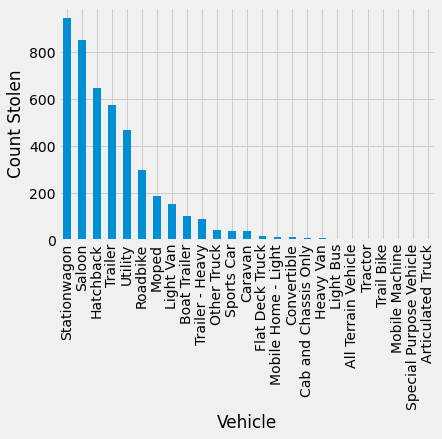

In [141]:
#Data Viz #1 - Vehicle Type Stolen

plot_vehicle_gb = vehicle_gb['vehicle_id'].count().sort_values(ascending = False)
plot_vehicle_gb.plot(kind = 'bar', xlabel = 'Vehicle', ylabel = 'Count Stolen')

<AxesSubplot:xlabel='Color', ylabel='Count Stolen'>

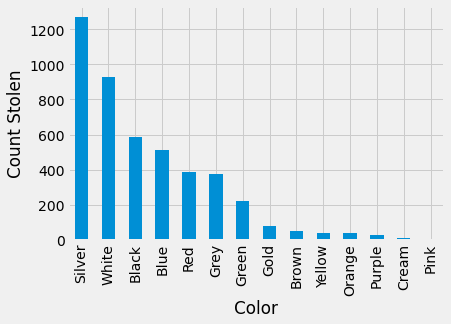

In [137]:
#Data Viz #2 - Color Vehicle Stolen

plot_color_gb = color_gb['vehicle_id'].count().sort_values(ascending = False)
plot_color_gb.plot(kind = 'bar', xlabel = 'Color', ylabel = 'Count Stolen')